<a href="https://colab.research.google.com/github/MohamedMadhoun/Prediction-of-Product-Sales/blob/main/prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Prediction of Product Sales
Author : Mohammed Al-Madhoun

## EDA Functions

In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
               edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white',
                size=3,zorder=0)
  # Rotate xlabels
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

## Project Overview

##Part 1: Data Loading & Initial Exploration


In [ ]:
import pandas as pd
from sklearn import set_config
set_config(transform_output='pandas')

fpath="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df_2=df.copy()
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB





##  Part 2 : Data Cleaning



1) How many rows and columns?

In [ ]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 8523 rows and 12 columns.


2) What are the datatypes of each variable?



In [ ]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


3) Are there duplicates? If so, drop any duplicates.



In [ ]:
duplicates = df[df.duplicated()]
print(f"There are {duplicates.shape[0]} duplicate rows.")

There are 0 duplicate rows.


4) Identify missing values.



In [ ]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


5) Address the missing values by using a placeholder value.



In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("MISSING")
    else:
        df[col] = df[col].fillna(-1)
        ##df['Item_Weight'] = df['Item_Weight'].fillna(
       ## df.groupby('Item_Type')['Item_Weight'].transform('mean')


6) Confirm that there are no missing values after addressing them.



In [ ]:
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")

Value counts for column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value counts for column: Item_Weight
Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 5.210        2
 9.420        1
 7.685        1
 5.400        1
 6.520        1
Name: count, Length: 416, dtype: int64


Value counts for column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column: Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Value counts for column: Item_Type
Item_Type
Fruits and Veget

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower().replace({
    'low fat': 'low fat',
    'lf': 'low fat',
    'reg': 'regular'
})


print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content
low fat    5517
regular    3006
Name: count, dtype: int64


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


9)Saving The Data Cleaning

In [ ]:
df_cleaned = df.copy()


df_cleaned.to_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv', index=False)


##Part 3: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('images', exist_ok=True)

sns.set(style='whitegrid')
df_cleaned = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')


In this part, we will explore the dataset using visualizations to better understand the features that influence product sales.

We will include the following types of plots:
- Histograms to view the distribution of numerical features.
- Boxplots to examine statistical summaries and detect outliers.
- Countplots to visualize the frequency of categorical features.
- A heatmap to analyze the correlation between numerical variables.

### Distribution of Item MRP

This histogram shows how product prices (Item MRP) are distributed across the dataset.

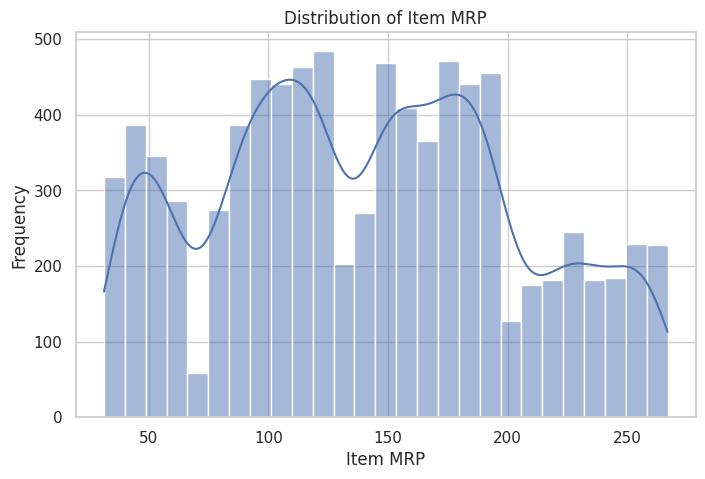

In [ ]:
plt.figure(figsize=(8, 5))

sns.histplot(df_cleaned['Item_MRP'], kde=True)

plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')

plt.savefig('images/item_mrp_histogram.png', dpi=300)

plt.show()



### Boxplot of Item Outlet Sales

This boxplot displays the distribution and summary statistics of sales, helping us detect potential outliers.


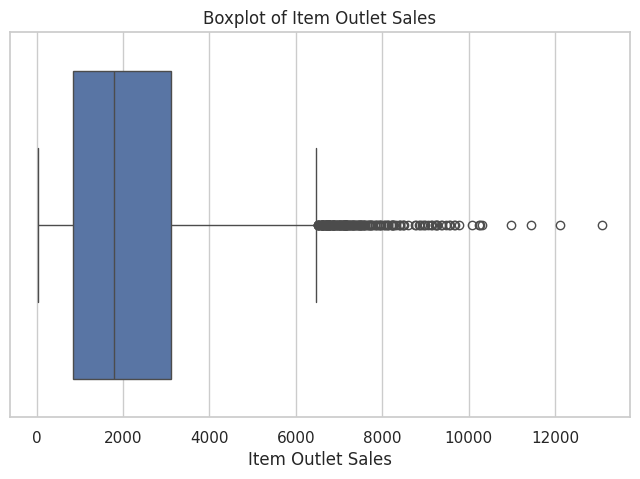

In [ ]:
plt.figure(figsize=(8, 5))


sns.boxplot(x=df_cleaned['Item_Outlet_Sales'])


plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')


plt.savefig('images/sales_boxplot.png', dpi=300)


plt.show()

### Count of Outlet Sizes

This countplot shows the number of stores in each Outlet Size category (Small, Medium, High).


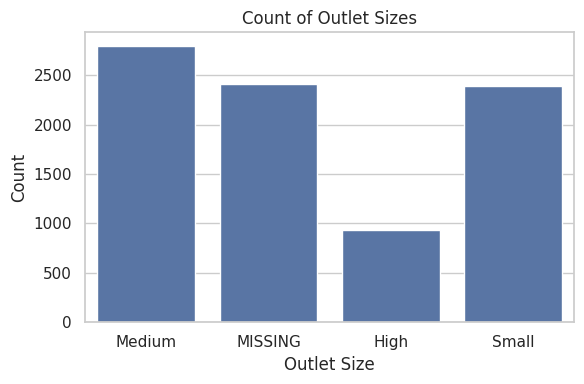

In [ ]:

fig, ax = plt.subplots(figsize=(6, 4))


sns.countplot(data=df, x='Outlet_Size', ax=ax)


ax.set_title('Count of Outlet Sizes')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')

fig.tight_layout()

fig.savefig('images/outlet_size_count.png', dpi=300)

plt.show()



### Correlation Heatmap

This heatmap visualizes the correlation between numerical features such as Item MRP, Item Weight, and Item Outlet Sales.


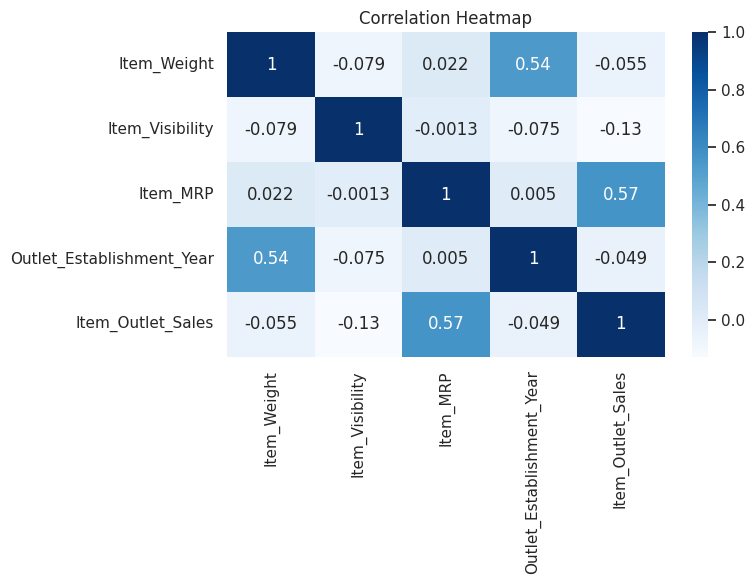

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))


corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, cmap='Blues', ax=ax)

ax.set_title('Correlation Heatmap')


fig.tight_layout()


fig.savefig('images/correlation_heatmap.png', dpi=300)


plt.show()


Relationship Between Item Price (MRP) and Sales


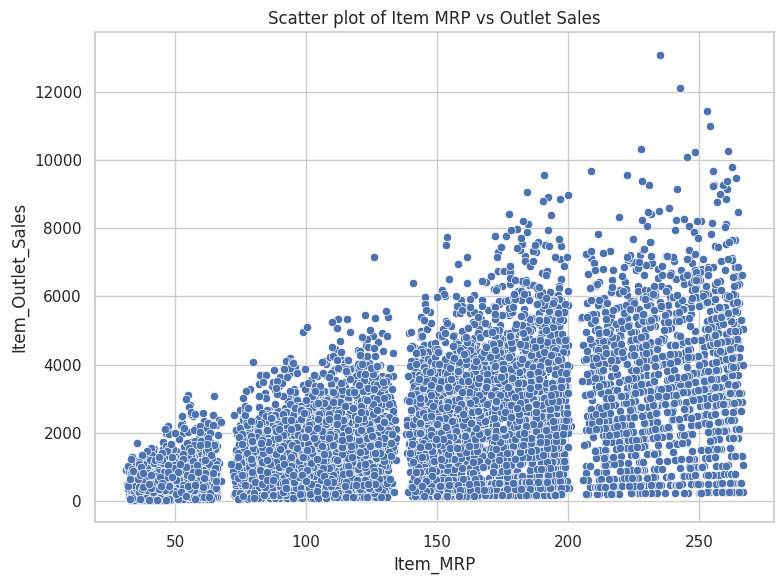

In [ ]:
# In this scatter plot, we aim to visualize the relationship between the MRP of items
# and their corresponding sales at different outlets.
# This will help us understand if there is a correlation between the price of an item and its sales performance.

import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_cleaned, ax=ax)
ax.set_title('Scatter plot of Item MRP vs Outlet Sales')


fig.tight_layout()


fig.savefig('images/item_mrp_vs_sales.png', dpi=300)

plt.show()


# Feature Inspection

In [ ]:
import pandas as pd
import numpy as np


df= pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')


df_inspect = df.copy()
df_inspect.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_inspect['Item_Weight'] = df_inspect['Item_Weight'].replace(-1, np.nan)

df_inspect['Outlet_Size'] = df_inspect['Outlet_Size'].replace('MISSING', np.nan)


In [ ]:
df_inspect.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


## Inspecting Each Feature

### Feature: Item_Weight


  Definition: Weight of the product.


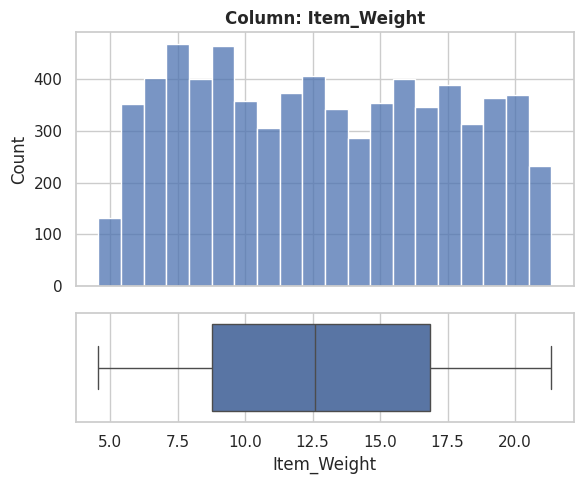

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


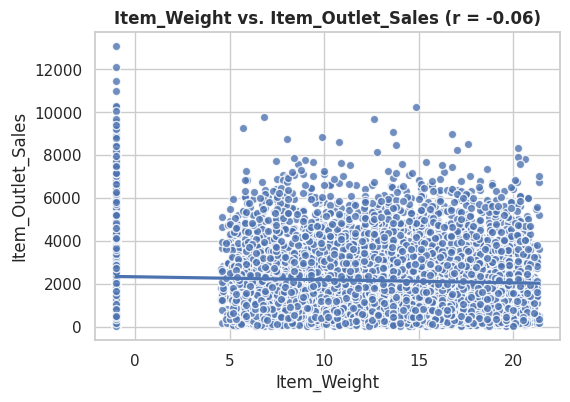

In [ ]:
explore_numeric(df_inspect, 'Item_Weight');
plot_numeric_vs_target(df, 'Item_Weight', y='Item_Outlet_Sales');


### Feature: Item_Weight

**What type of feature is it?**  
- Numeric (continuous).

**How many null values? What percentage? What would you do with the null values?**  
- There are about 1463 null values (approximately 17.7% of the data).  
- I would impute the missing values with the median since the distribution is likely skewed.

**Is the feature constant or quasi-constant?**  
- No, it is not constant or quasi-constant. Values vary considerably.

**What is the cardinality? Is it high (>10)?**  
- Not applicable, numeric.

**Would we know this feature before the target is determined?**  
- Yes, item weight is known before sales occur.

**Is there a business case/understanding reason to exclude based on our business case?**  
- No, item weight may influence sales and should be retained.

---

### Multivariate Analysis (Feature vs Target):
- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - Looking at the plot and data, the relationship seems weak but potentially present.
  



# Feature: Item_Visibility


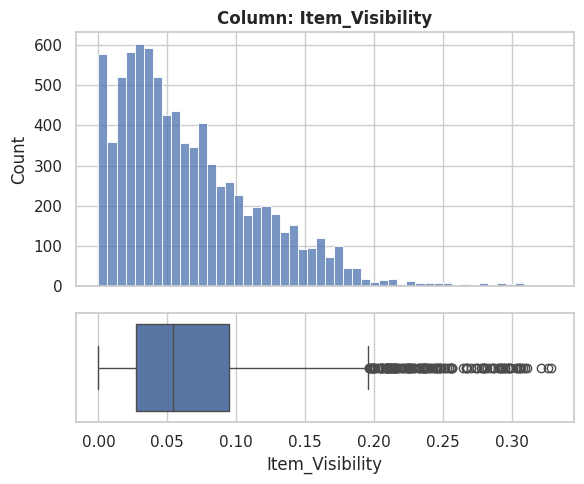

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


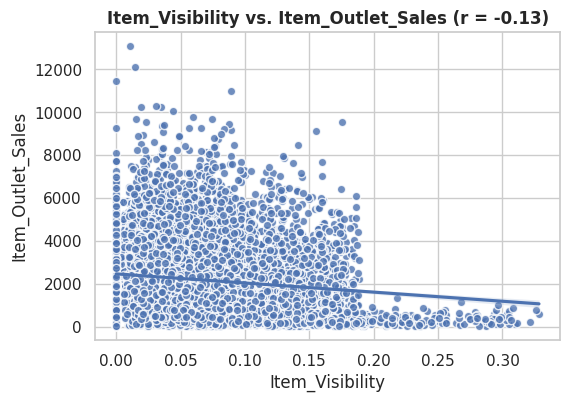

((<Figure size 600x400 with 1 Axes>,
  <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>),)

In [ ]:
# Univariate plots & stats for Item_Visibility
explore_numeric(df_inspect, 'Item_Visibility')

# Multivariate plot: Item_Visibility vs Item_Outlet_Sales
plot_numeric_vs_target(df_inspect, 'Item_Visibility', y='Item_Outlet_Sales'),


### Feature: Item_Visibility

**What type of feature is it?**  
- Numeric (continuous).

**How many null values? What percentage? What would you do with the null values?**  
- No Null Value

**Is the feature constant or quasi-constant?**  
- No, it is not constant or quasi-constant. Values vary considerably.

**What is the cardinality? Is it high (>10)?**  
- Not applicable, numeric.

**Would we know this feature before the target is determined?**  
- Yes, item weight is known before sales occur.

**Is there a business case/understanding reason to exclude based on our business case?**  
- No, item visibility may affect customer awareness and thus influence sales.


---

### Multivariate Analysis (Feature vs Target):
- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not strongly. While visibility might intuitively impact sales, its direct effect may be limited or indirect.


  - Does this feature appear to be a predictor of the target?
    - r=−0.13 indicates a very weak negative relationship with sales. This suggests that higher visibility is slightly associated with lower sales, which may reflect underlying data issues or business nuances.


  



#Feature: Item_MRP


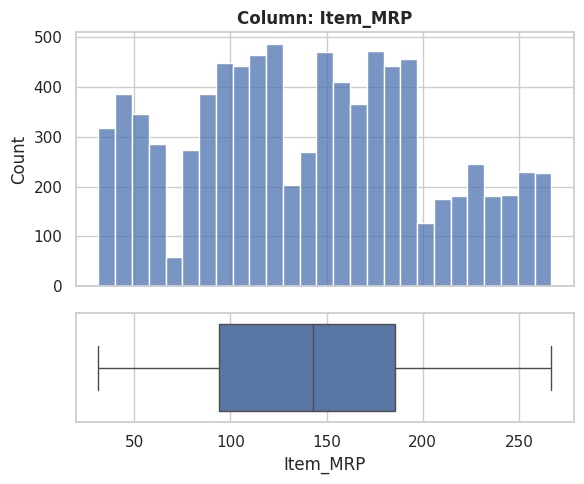

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


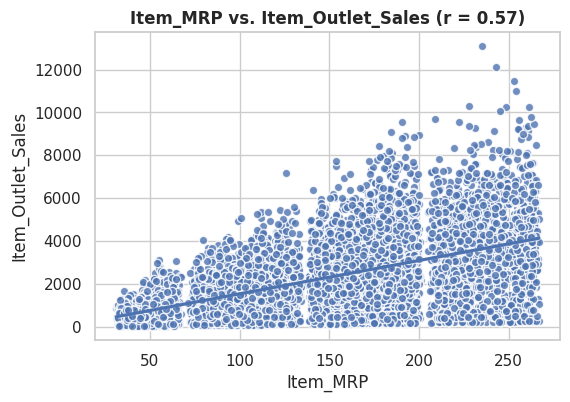

In [ ]:
# Univariate exploration + info
fig, axes = explore_numeric(df, 'Item_MRP')

# Multivariate plot (Item_MRP vs target)
fig2, ax2 = plot_numeric_vs_target(df, 'Item_MRP', y='Item_Outlet_Sales');



### Feature: Item_MPR

**What type of feature is it?**  
- Numeric (continuous).

**How many null values? What percentage? What would you do with the null values?**  
- No Null Value

**Is the feature constant or quasi-constant?**  
- No, it is not constant or quasi-constant. Values vary considerably.

**What is the cardinality? Is it high (>10)?**  
- Not applicable, numeric.

**Would we know this feature before the target is determined?**  
- Yes

**Is there a business case/understanding reason to exclude based on our business case?**  
- No, price is definitely relevant for predicting sales.
.


---

### Multivariate Analysis (Feature vs Target):
- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, the Maximum Retail Price (MRP) of an item is expected to be a predictor of sales. Generally, higher-priced items might have higher sales value, though quantity sold could vary.


  - Does this feature appear to be a predictor of the target?
     - Yes, the positive correlation between Item_MRP and Item_Outlet_Sales indicates that the price influences sales revenue.



  






# Outlet_Establishment_Year

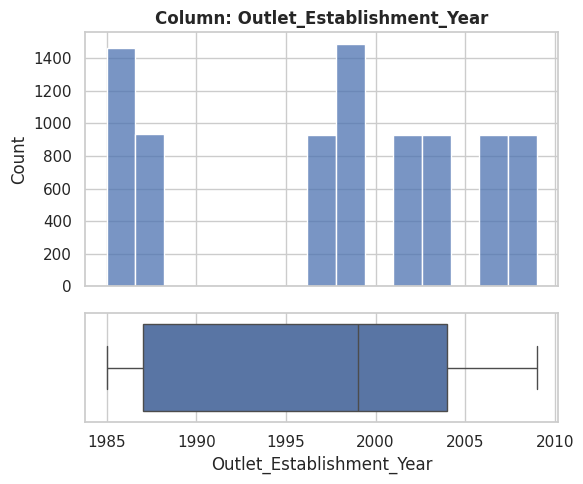

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


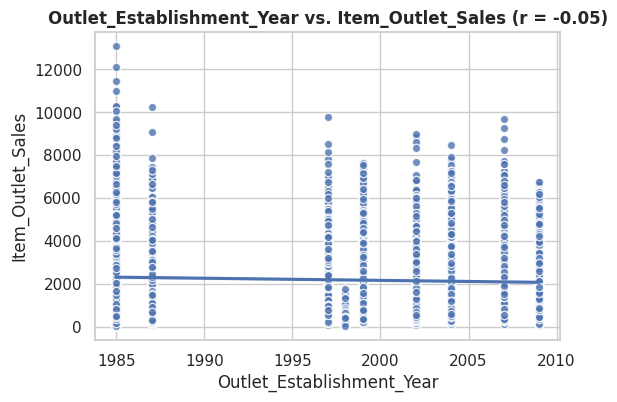

In [ ]:
explore_numeric(df_inspect, 'Outlet_Establishment_Year')
plot_numeric_vs_target(df_inspect, 'Outlet_Establishment_Year', y='Item_Outlet_Sales');






### Feature: Outlet_Establishment_Year

**What type of feature is it?**  
- Numeric (continuous).

**How many null values? What percentage? What would you do with the null values?**  
- No Null Value

**Is the feature constant or quasi-constant?**  
- No, it is not constant or quasi-constant. Values vary considerably.

**What is the cardinality? Is it high (>10)?**  
- Not applicable, numeric.

**Would we know this feature before the target is determined?**  
- Yes

**Is there a business case/understanding reason to exclude based on our business case?**  
- No, older outlets might have different sales patterns.



---

### Multivariate Analysis (Feature vs Target):
- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly yes.


  - Does this feature appear to be a predictor of the target?
     - Not significantly. The correlation coefficient
       r=−0.05 indicates a very weak negative relationship with the target, suggesting that this feature has minimal predictive power on its own.

.



  







# Item_Type


/tmp/ipython-input-64-1200028217.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


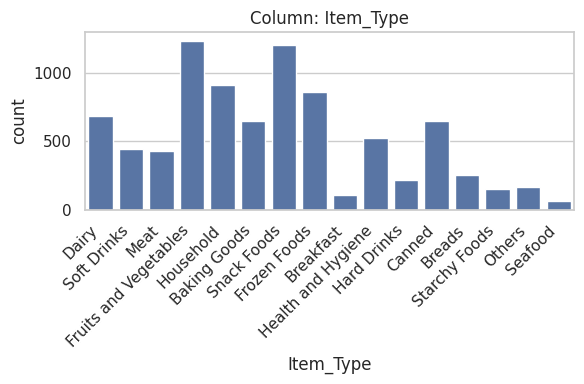

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


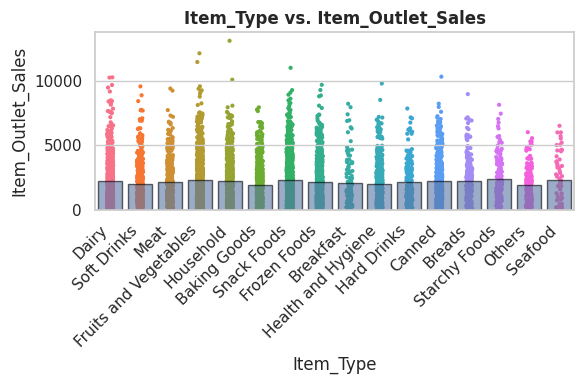

In [ ]:
explore_categorical(df_inspect, 'Item_Type');
plot_categorical_vs_target(df_inspect, 'Item_Type');

 Feature: Item_Type
1. What type of feature is it?
 - Categorical (Nominal)  represents different types of items (e.g., Dairy, Soft Drinks, Meat, etc.)

2. How many null values? What percentage? What would you do with the null values?
 - Null Values: 0 (0%)
 - No missing values, so no need for imputation or removal.

3. Is the feature constant or quasi-constant?
  - No  It has a diverse set of values, and the most common value does not dominate the dataset (less than 98%).

4. What is the cardinality? Is it high (>10)?
 - Yes  There are 16 unique values, which is considered high cardinality for a categorical feature.

5. Would we know this feature before the target is determined?
 - Yes The type of item is known before predicting its sales.

6. Is there a business understanding reason to exclude it?
  - No  Item type is likely an important feature that may affect item sales.
 It makes sense to keep it in the model.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes  Different item types likely sell in different quantities and prices (e.g., Dairy vs. Household items), so it's reasonable to expect this feature to affect the target.

8. Does this feature appear to be a predictor of the target?
 - Needs to be confirmed with a boxplot or barplot grouped by Item_Type vs
   Item_Outlet_Sales.
  But in general, yes, early visualizations often show variations in sales across item types, suggesting predictive value.



# Feature: Item_Fat_Content


/tmp/ipython-input-64-1200028217.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


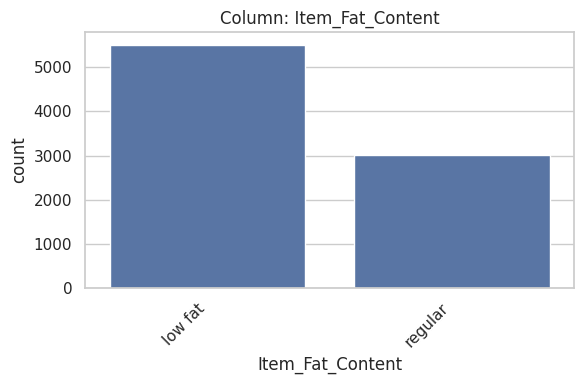

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


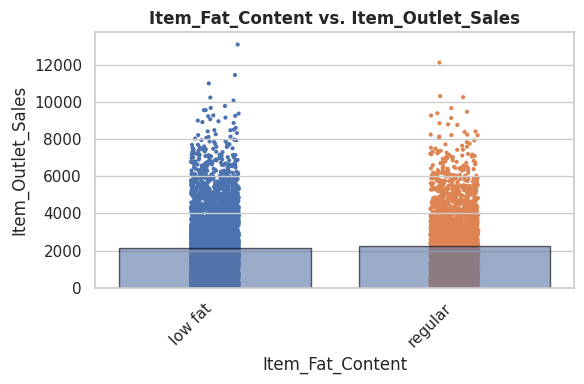

In [ ]:
explore_categorical(df_inspect, 'Item_Fat_Content')
plot_categorical_vs_target(df_inspect, 'Item_Fat_Content');

1. What type of feature is it?
 - Categorical (Nominal) – Represents fat content levels like Low Fat, Regular, etc.

2. How many null values? What percentage? What would you do with the null values?
 - Null Values: 0 (0%)
 - No missing values → No action needed.

3. Is the feature constant or quasi-constant?
  - Not

4. What is the cardinality? Is it high (>10)?
 No
5. Would we know this feature before the target is determined?
 - Yes Fat content is a product label and is known before sales happen.

6. Is there a business understanding reason to exclude it?
 - No  This feature might affect consumer behavior. It’s relevant and useful.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes  People might buy more low-fat or regular-fat products depending on their health preferences, so it can influence sales.

8. Does this feature appear to be a predictor of the target?
 - Not clearly. When analyzing the average product sales by fat content, there is only a slight difference between categories (such as "Low Fat" and "Regular"), indicating that the relationship between fat content and sales is weak or not strong. Therefore, this feature does not appear to be a strong predictor of sales.





# Outlet_Size

/tmp/ipython-input-64-1200028217.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


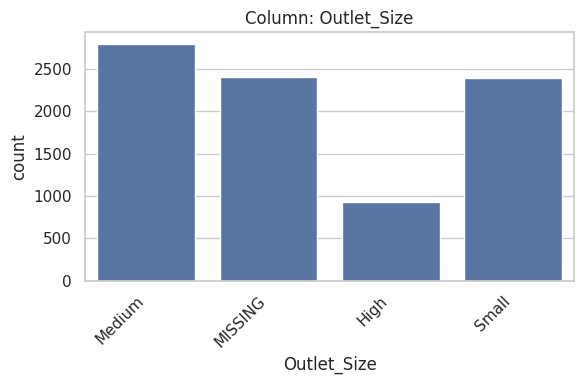

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


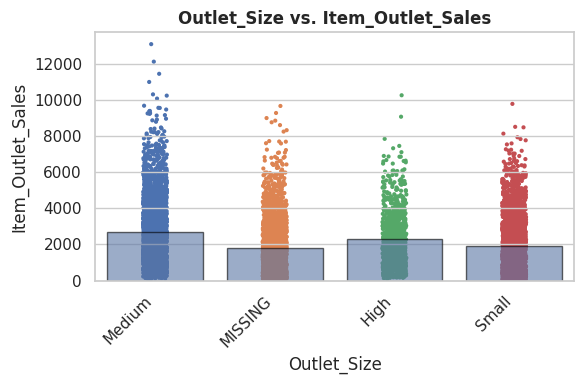

In [ ]:
explore_categorical(df_inspect, 'Outlet_Size')
plot_categorical_vs_target(df_inspect, 'Outlet_Size');

1. What type of feature is it?
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values?

  - Null values:  241

  - Percentage of nulls: 28.7%

  - Action: Impute missing values. Since Outlet_Size is related to Outlet_Type, I would impute missing values based on the mode of Outlet_Size within each Outlet_Type. Alternatively, fill with a placeholder such as 'MISSING'.

3. Is the feature constant or quasi-constant?
   - No, it is not constant or quasi-constant. It has three main categories (e.g., Small, Medium, Large).

4. What is the cardinality? Is it high (>10)?
   - Cardinality is low, with 3 unique values.

5. Would we know this feature before the target is determined?
  - Yes. The outlet size is known before any sales (target) occur.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No, this feature is relevant since store size can influence sales volume.

7. Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, because the size of the outlet likely affects its sales capacity.

8. Does this feature appear to be a predictor of the target?
   - Yes, from exploratory analysis, different outlet sizes show different sales distributions, suggesting a predictive relationship.



#Feature Inspection: Outlet_Location_Type


/tmp/ipython-input-64-1200028217.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


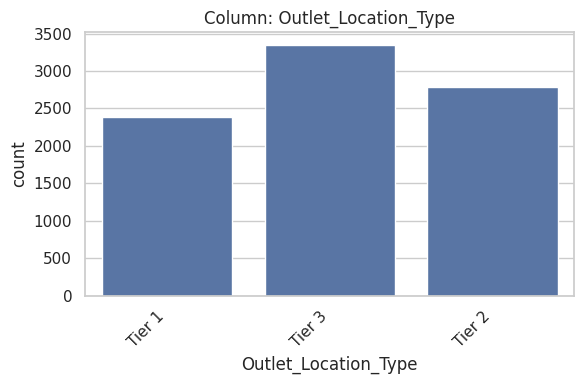

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


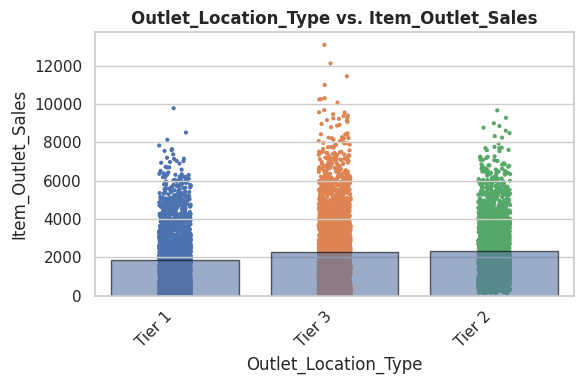

In [ ]:
explore_categorical(df_inspect, 'Outlet_Location_Type')
plot_categorical_vs_target(df_inspect, 'Outlet_Location_Type');

What type of feature is it?
 - Categorical (nominal)

How many null values? What percentage? What would you do with the null values?
 - No null value
Is the feature constant or quasi-constant?
 - No, it has multiple distinct categories.

What is the cardinality? Is it high (>10)?
 - No

Would we know this feature before the target is determined?
- Yes, this is a static attribute of the outlet known before sales happen.

Is there a business case/understanding reason to exclude based on our business case?
- No, this feature is important as location type can affect sales performance.

Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, location type affects customer traffic and sales volume, so it's expected to be predictive.

Does this feature appear to be a predictor of the target?
 -  yes, differences in sales by location type suggest it is a useful predictor.



# Outlet_Type

/tmp/ipython-input-64-1200028217.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


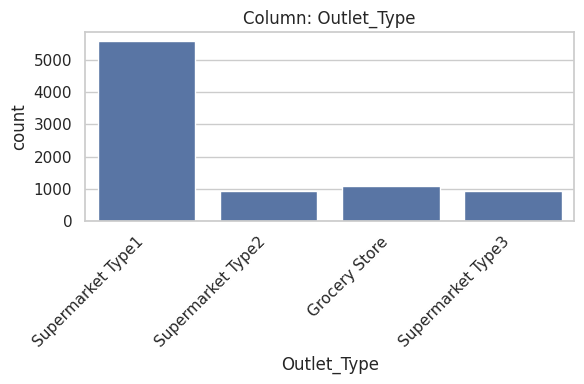

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


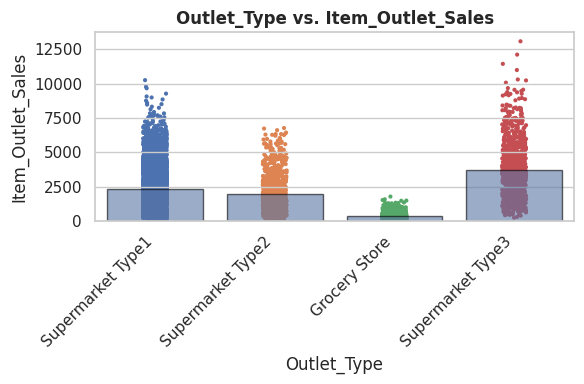

In [ ]:
explore_categorical(df_inspect, 'Outlet_Type')
plot_categorical_vs_target(df_inspect, 'Outlet_Type');

What type of feature is it?
- Categorical (nominal)

How many null values? What percentage? What would you do with the null values?
- no null.

Is the feature constant or quasi-constant?
 - No
What is the cardinality? Is it high (>10)?
 - No, the cardinality is low, typically around 4 to 5 categories.

Would we know this feature before the target is determined?
 - Yes, the outlet type is known before any sales happen.

Is there a business case/understanding reason to exclude based on our business case?
 - No, outlet type is relevant because different outlet types have different sales patterns and customer behaviors.

Based on your business understanding, would you expect this feature to be a predictor of the target?
 - Yes, outlet type influences sales because different store formats attract different customers.

Does this feature appear to be a predictor of the target?
 - Yes, based on EDA, sales distributions differ significantly across outlet types, suggesting predictive power.





# Project 1 - Part 5

## Preprocesing for Machine Learning

>For Part 5, you will go back to your original dataset with the goal of preventing data leakage.

Please note: If you imputed missing values based on a calculation on the entire dataset (such as mean), you should now perform that step after the train test split using SimpleImputer.

*   Identify the target (X) and features (y): We will assign the 'salary_in_usd' as the target and the rest of the relevant variables as the features matrix.
*   Perform a train test split
*   Create a pre processing pipeline to prepare the dataset for Machine Learning


### Imports

In [ ]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

### Reloading in the Data

In [ ]:
df_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [ ]:
df_2.shape

(8523, 12)

In [ ]:
df_2.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:

df_2['Item_Fat_Content'] = df_2['Item_Fat_Content'].replace({
    'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'
})



🔍 Column: Item_Weight
📦 Boxplot Method: 0 outliers
📉 Std Dev Method: 0 outliers
🎯 Percentile (10-90%) Method: 822 outliers


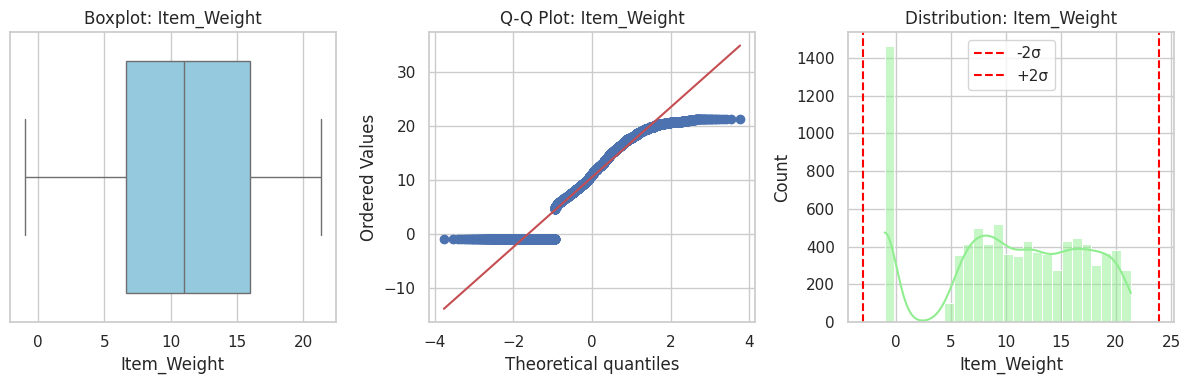


🔍 Column: Item_Visibility
📦 Boxplot Method: 144 outliers
📉 Std Dev Method: 368 outliers
🎯 Percentile (10-90%) Method: 1706 outliers


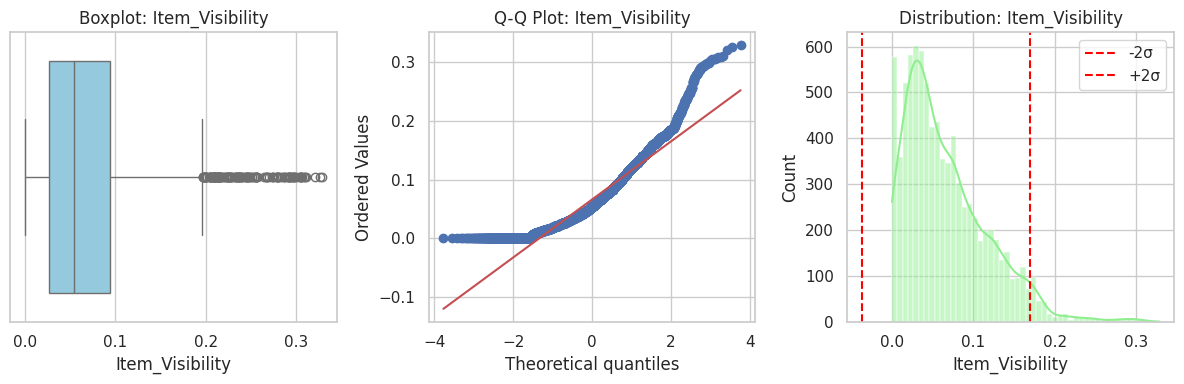


🔍 Column: Item_MRP
📦 Boxplot Method: 0 outliers
📉 Std Dev Method: 14 outliers
🎯 Percentile (10-90%) Method: 1704 outliers


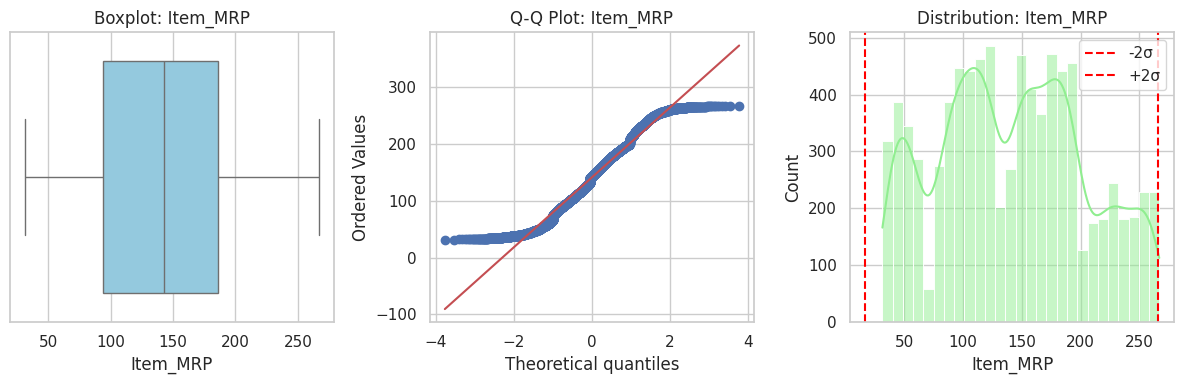


🔍 Column: Outlet_Establishment_Year
📦 Boxplot Method: 0 outliers
📉 Std Dev Method: 0 outliers
🎯 Percentile (10-90%) Method: 0 outliers


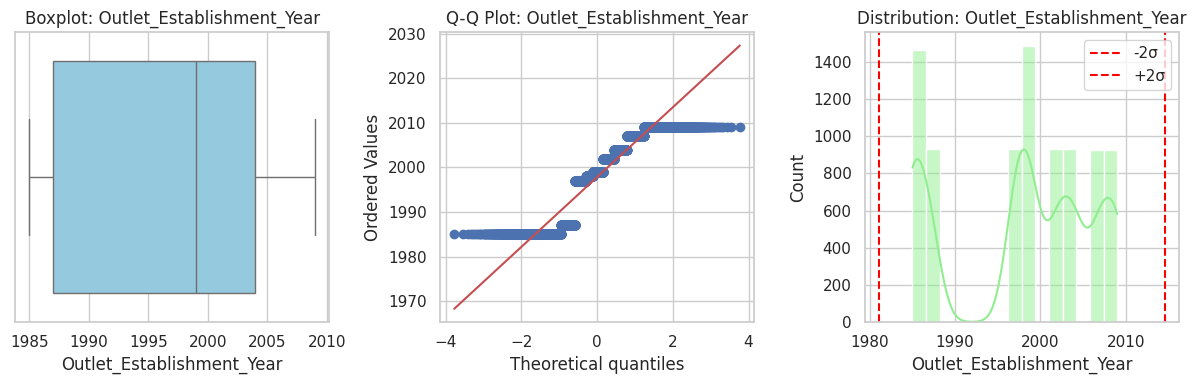


🔍 Column: Item_Outlet_Sales
📦 Boxplot Method: 186 outliers
📉 Std Dev Method: 405 outliers
🎯 Percentile (10-90%) Method: 1703 outliers


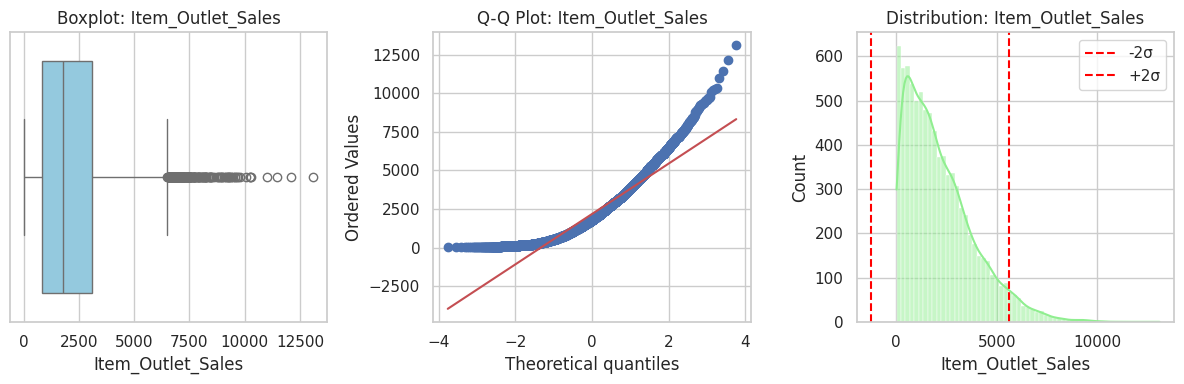

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_cols:
    print(f"\n🔍 Column: {col}")
    data = df[col].dropna()

    # --- 1. Boxplot ---
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = data[(data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)]
    print(f"📦 Boxplot Method: {len(outliers_iqr)} outliers")

    # --- 2. Standard Deviation ---
    mean = data.mean()
    std = data.std()
    lower = mean - 2 * std
    upper = mean + 2 * std
    outliers_std = data[(data < lower) | (data > upper)]
    print(f"📉 Std Dev Method: {len(outliers_std)} outliers")

    # --- 3. Percentile Method (10% - 90%) ---
    p10 = data.quantile(0.10)
    p90 = data.quantile(0.90)
    outliers_pct = data[(data < p10) | (data > p90)]
    print(f"🎯 Percentile (10-90%) Method: {len(outliers_pct)} outliers")

    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=data, color='skyblue')
    plt.title(f'Boxplot: {col}')

    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {col}')

    # Histogram
    plt.subplot(1, 3, 3)
    sns.histplot(data, kde=True, color='lightgreen')
    plt.axvline(lower, color='red', linestyle='--', label='-2σ')
    plt.axvline(upper, color='red', linestyle='--', label='+2σ')
    plt.title(f'Distribution: {col}')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
df_2[['Item_Identifier', 'Item_Type']].head(20)

,Item_Identifier,Item_Type
0,FDA15,Dairy
1,DRC01,Soft Drinks
2,FDN15,Meat
3,FDX07,Fruits and Vegetables
4,NCD19,Household
5,FDP36,Baking Goods
6,FDO10,Snack Foods
7,FDP10,Snack Foods
8,FDH17,Frozen Foods
9,FDU28,Frozen Foods


In [ ]:
df_2['Item_Category'] = df_2['Item_Identifier'].str[:2]
print(df_2.groupby('Item_Category')['Item_Type'].unique())


Item_Category
DR                    [Soft Drinks, Hard Drinks, Dairy]
FD    [Dairy, Meat, Fruits and Vegetables, Baking Go...
NC              [Household, Health and Hygiene, Others]
Name: Item_Type, dtype: object


In [ ]:
def categorize_item_type(x):
    if x in ['Soft Drinks', 'Hard Drinks']:
        return 'Drinks'
    elif x in ['Household', 'Health and Hygiene', 'Others']:
        return 'Non-Consumable'
    else:
        return 'Food'

df_2['Item_Category'] = df_2['Item_Type'].apply(categorize_item_type)

print(df_2['Item_Category'].value_counts())
print(df_2.groupby('Item_Category')['Item_Type'].unique())


Item_Category
Food              6265
Non-Consumable    1599
Drinks             659
Name: count, dtype: int64
Item_Category
Drinks                                   [Soft Drinks, Hard Drinks]
Food              [Dairy, Meat, Fruits and Vegetables, Baking Go...
Non-Consumable              [Household, Health and Hygiene, Others]
Name: Item_Type, dtype: object


In [ ]:
df_2.drop('Item_Identifier', axis=1, inplace=True)


In [ ]:
print(df_2.columns.tolist())


['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category']


In [ ]:
target = 'Item_Outlet_Sales'
X = df_2.drop(columns=[target]).copy()
y = df_2[target].copy()

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
Categorical columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include = 'object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Category']

In [ ]:
impute_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop='first')

cat_pipe = make_pipeline(impute_cat,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [ ]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Food,Item_Category_Non-Consumable
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4810,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn import set_config
set_config(transform_output='pandas')
class GroupByImputer(BaseEstimator, TransformerMixin):
    def __init__(self, group_col, target_col):
        self.group_col = group_col
        self.target_col = target_col
        self.fill_values_ = {}

    def fit(self, X, y=None):
        df = X.copy()
        self.fill_values_ = df.groupby(self.group_col)[self.target_col].mean().to_dict()
        self.global_mean_ = df[self.target_col].mean()
        return self

    def transform(self, X):
        df = X.copy()
        def impute(row):
            if pd.isna(row[self.target_col]):
                return self.fill_values_.get(row[self.group_col], self.global_mean_)
            else:
                return row[self.target_col]
        df[self.target_col] = df.apply(impute, axis=1)
        return df[[self.target_col]]




In [ ]:
#   pipline Item_Weight مع Item_Type
item_weight_pipe = make_pipeline(
    GroupByImputer(group_col='Item_Type', target_col='Item_Weight'),
    StandardScaler()
)


In [ ]:
num_cols = ['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
num_pipe = StandardScaler()


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('item_weight', item_weight_pipe, ['Item_Type', 'Item_Weight']),
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_selector)
    ],
    remainder='drop'
)


In [ ]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:
X_train_df = X_train_processed
X_test_df =X_test_processed

print("X_train_processed:")
print(X_train_df.head())

print("\nX_test_processed:")
print(X_test_df.head())


X_train_processed:
      item_weight__Item_Weight  num__Item_Visibility  num__Item_MRP  \
4776                  0.815433             -0.712775       1.828109   
7510                  0.554889             -1.291052       0.603369   
5828                 -0.131997              1.813319       0.244541   
5327                 -1.168248             -1.004931      -0.952591   
4810                  1.526005             -0.965484      -0.336460   

      num__Outlet_Establishment_Year  cat__Item_Fat_Content_Regular  \
4776                        1.327849                            0.0   
7510                        1.327849                            1.0   
5828                        0.136187                            1.0   
5327                        0.732018                            0.0   
4810                        0.493686                            0.0   

      cat__Item_Type_Breads  cat__Item_Type_Breakfast  cat__Item_Type_Canned  \
4776                    0.0                    

In [ ]:
X_train_processed.isna().sum()

,0
item_weight__Item_Weight,0
num__Item_Visibility,0
num__Item_MRP,0
num__Outlet_Establishment_Year,0
cat__Item_Fat_Content_Regular,0
cat__Item_Type_Breads,0
cat__Item_Type_Breakfast,0
cat__Item_Type_Canned,0
cat__Item_Type_Dairy,0
cat__Item_Type_Frozen Foods,0


# Project 1 - Part 6

## Maching Learning - Training the Models

In [ ]:
from sklearn.ensemble import RandomForestRegressor # NEW
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

from sklearn import set_config
set_config(transform_output='pandas')


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred)**0.5
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)


In [ ]:
preprocessor

ColumnTransformer(transformers=[('item_weight',
                                 Pipeline(steps=[('groupbyimputer',
                                                  GroupByImputer(group_col='Item_Type',
                                                                 target_col='Item_Weight')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Type', 'Item_Weight']),
                                ('num', StandardScaler(),
                                 ['Item_Visibility', 'Item_MRP',
                                  'Outlet_Establishment_Year']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x79dc68335550>)])

In [ ]:
from sklearn import set_config
set_config(transform_output='pandas')

X_train, X_test, y_train, y_test = train_test_split(df_2, y, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,557.062
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.132
- MSE = 1,194,409.343
- RMSE = 1,092.890
- R^2 = 0.567


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.385
- MSE = 184,151.092
- RMSE = 429.128
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 772.527
- MSE = 1,222,419.005
- RMSE = 1,105.631
- R^2 = 0.557


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train_processed, y_train)
best_rf = grid.best_estimator_
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 615.973
- MSE = 754,365.379
- RMSE = 868.542
- R^2 = 0.745

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 741.730
- MSE = 1,133,848.563
- RMSE = 1,064.823
- R^2 = 0.589


###  Final Model Recommendation: Tuned Random Forest Regressor

After evaluating all models, we recommend using the **Tuned Random Forest Regressor** for predicting product sales.

---

####  Interpretation for Stakeholders:

Our final model explains approximately **59.3%** of the variation in product sales on unseen data.  
This means that our model is able to capture **most of the important trends** in the data, making it a reliable tool for forecasting.


###  Summary:

- Tuned Random Forest provides the **best balance** between accuracy and generalization.
- It captures more signal in the data without overfitting severely.
- RMSE and R² metrics make it understandable and trustworthy for stakeholders.


## Extract and visualize the coefficients determined by your model.

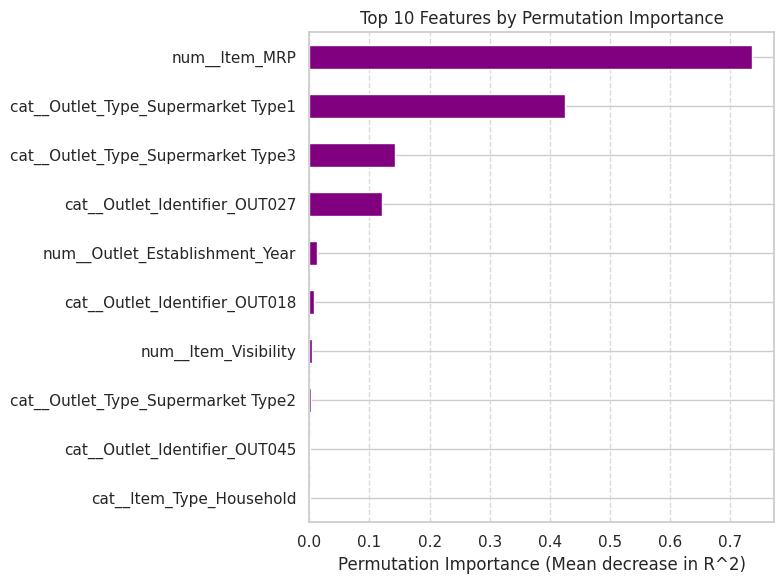

In [ ]:
from sklearn.inspection import permutation_importance


result = permutation_importance(best_rf, X_test_processed, y_test, n_repeats=10, random_state=42, scoring='r2')


import pandas as pd
import matplotlib.pyplot as plt

perm_importance = pd.Series(result.importances_mean, index=X_test_processed.columns)

perm_importance = perm_importance.sort_values(ascending=False)

plt.figure(figsize=(8,6))
perm_importance.head(10).plot(kind='barh', color='purple')
plt.gca().invert_yaxis()
plt.xlabel('Permutation Importance (Mean decrease in R^2)')
plt.title('Top 10 Features by Permutation Importance')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Here's an interpretation of the top 3 most impactful features based on the "Top 10 Features by Permutation Importance" image.

This chart illustrates feature importance based on "Permutation Importance," a method to measure how much each feature affects the model's performance. The longer the bar, the more important the feature.

The top 3 most impactful features are:

1.  **`num_Item_MRP`**:
    *   **Explanation:** This is clearly the most important feature. It indicates that the Maximum Retail Price (MRP) of an item has the largest impact on the variable the model is trying to predict. If the value of `num_Item_MRP` changes, the model's prediction is expected to change significantly. This means the item's price is the strongest factor in determining the outcome.

2.  **`cat_Outlet_Type_Supermarket Type1`**:
    *   **Explanation:** This is the second most important feature. It suggests that the "Supermarket Type1" outlet type has a substantial impact on the model's performance. This means that an outlet being of this specific type significantly influences the target variable, making it a key factor to consider.

3.  **`cat_Outlet_Type_Supermarket Type3`**:
    *   **Explanation:** This is the third most important feature. It indicates that the "Supermarket Type3" outlet type also has a significant impact on the model's performance, though slightly less than "Supermarket Type1". This means this type of outlet plays an important role in determining the predicted outcome.

In summary, this chart shows that the item's price (MRP) is the most influential factor, followed by the outlet type, with "Supermarket Type1" and "Supermarket Type3" being among the most important outlet types affecting the results.


In [ ]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs


In [ ]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:

        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [ ]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5),
                intercept=False, intercept_name="intercept",
                annotate=False, ha='left', va='center', size=12,
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)

        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient',
            ylabel='Feature Names',
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

/tmp/ipython-input-137-1608253413.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


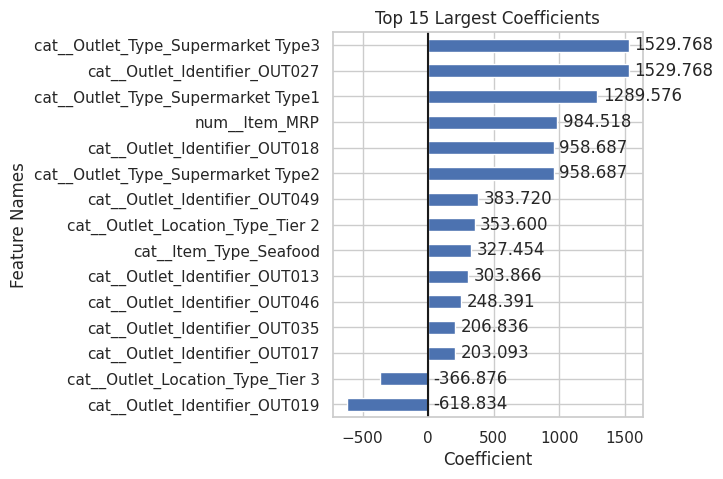

In [ ]:
coeffs = get_coeffs_linreg(lin_reg)

plot_coeffs(coeffs, top_n=15, annotate=True);
plt.tight_layout()
plt.savefig("linear_regression_top10_coeffs.png", dpi=300)
plt.show()


Here are the top 3 most impactful features and their coefficients explained in simple language, based on the provided image:

The top 3 most impactful features are:

1.  **`cat_Outlet_Type_Supermarket Type3`** with a coefficient of **1529.768**:
    *   **Simple Explanation:** This means that outlets categorized as "Supermarket Type3" have a very large positive impact on the predicted variable (likely sales or a similar metric). In other words, if an outlet is of this type, it is expected to perform significantly better compared to other types, increasing the target variable by 1529.768 units.

2.  **`cat_Outlet_Identifier_OUT027`** with a coefficient of **1529.768**:
    *   **Simple Explanation:** This indicates that the specific outlet identified as "OUT027" also has a very large positive impact on the target variable, almost identical to "Supermarket Type3". This means this particular outlet contributes significantly to increasing the predicted variable by 1529.768 units.

3.  **`cat_Outlet_Type_Supermarket Type1`** with a coefficient of **1289.576**:
    *   **Simple Explanation:** This feature suggests that outlets of "Supermarket Type1" have a strong positive impact on the target variable, though slightly less than "Supermarket Type3" and "OUT027. If an outlet is of this type, the target variable is expected to increase by 1289.576 units.

In general, large positive coefficients indicate that these features contribute significantly to increasing the predicted value, while negative coefficients (like `cat_Outlet_Identifier_OUT019` and `cat_Outlet_Location_Type_Tier 3` at the bottom of the chart) suggest they decrease the predicted value.
